<a href="https://colab.research.google.com/github/edulapalle/CS584-ML/blob/main/ML%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group-1**

**Title:** Classification of Doremon cartoon characters from a custom Image dataset using a CNN model.

**Team members:**
Santosh Reddy Edulapalle - A20501739
Venkata Siva Rupesh Akurati - A20501754
Jack Harrison Mohr -A20503445

**This is our .ipynb file for the project. We are going to code everything in this file.**

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Image dataset:** We are using OpenCV to read the video and capture image with rate of 1 frame per second.

**ImageSS** This function takes in path of the video and uses OpenCV to read each frame and captures the images.

In [34]:
#code to capture images from videos using Opencv.
import os

#importing cv2 from OpenCV
import cv2
from datetime import datetime

def ImageSS(videoPath):

    videoObject = cv2.VideoCapture(videoPath)
    frameNumber = 1

    # checks whether frames were extracted
    boolean = 1
    start = datetime.now()
    try:
        while boolean:
           # cv2.waitKey(10) {doesnt reduce fps}
            boolean, image = videoObject.read()
            cv2.imwrite("frame%d.jpg" %frameNumber, image)
            frameNumber += 1
    #exception handling
    except:
        print("All the frames are read!")
    finally:
        end = datetime.now()
    #calculating execution time.
    executionTime = (end - start).total_seconds() * 10**3
    print(f"The execution time of above program is : {executionTime:.03f}ms")


The below cell is commented to prevent it from accidental running.Uncomment it to use the program to capture video frames.

In [35]:
#ImageSS("/Users/santosh/Downloads/Doremon_test2.mov")

**Training cascade classifier from scratch:**

Since doremon data set is not availble at the time  of starting this project, we do not find any scascade classifeiers to detect the characteres, so we tried to train our own cascade classifier from scratch.

Below is an attempt to train the classifiers.

**generate_neg_description_txt_file** This function runs over the negative images folder creates a new text tile with all the names in negative image folder + negative tag attached to it.

In [36]:
#Uncomment this only when needed.
#Creating our own cascade classifier from scratch.
# we are going to train the classifier with our own doremon data.
#generating negative texts for background/( unimportant) data
# def generate_neg_description_txt_file():
#     with open('negative.txt','w') as f:
#         for imageName in os.listdir('negative'):
#             f.write('negative/' + imageName + '\n')
# generate_neg_description_txt_file()

negatives.txt is relatively easy to do. But for positives.txt, we need to manually annotate the frame of the face for each image. To help with it, openCV has annotations functions which is only available on version 3x.

 We re-installed openCV 3.4.16 to use its annotations functions. For the rest of the project, we will be using openCV latest version.
Having had so many troubles with openCV 3.4.16 on my mac, and spending one full day on debugging, I decided to move on to a windows PC and finish the annotation process. I will be transferring the trained model(xml), related files ( annotations.txt) to this mac for further project build.

The code for creating/ generating positive text samples for positive ( target characters) is entirely done on CMD. We used opencv_annotations, opencv_createsamples, opencv_traincascade from opencv 3.4.16 version and stored the required models in respective .xml files. The models we created are: cascadeAll.xml,doremon.xml,nobita.xml,shizuka.xml

Reference - Opencv official documentation.
https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html


Below is an attempt to automatically detect images from video with the help of our trained cascades, its accuracy is not good enough. so we saved it for future development.

In [37]:

##commented for future development.( out of scope for current project.)


#import numpy as np
#
# # settings
# videopath = '/Users/santosh/Desktop/dorVid/'
# exclusion = {
#     '.DS_Store'
# }
#
# # gets the import location for videos (dataset).
# def get_dataset(videopath=videopath):
#     videos = os.listdir(os.path.dirname(videopath))
#     for item in videos:
#         if item in exclusion:
#             videos.remove(item)
#     return videos
#
# # detect character by using a custom trained haar cascade for each character.
# def detect(character, video, show_video=True):
#     cap = cv2.VideoCapture(videopath + video)
#     Dor_face_cascade = cv2.CascadeClassifier('cascadeAll.xml')
#     results_path = os.path.join('results/' + "Dor_char")
#
#     # make a folder in results for our recognised faces.
#     if not os.path.exists(results_path) and character['save'] == True:
#         os.mkdir(results_path)
#
#     while(1):
#         # grab a frame.
#         ret, frame = cap.read()
#         faces = None
#
#
#         if character['name'] == "Doremon":
#             # detect faces in our image.
#             # try only with frame, no extra parameters.
#             faces = Dor_face_cascade.detectMultiScale(frame,
#                                                   scaleFactor=1.05,
#                                                   minNeighbors=4,
#                                                   minSize=(24, 24),
#                                                   flags=cv2.CASCADE_SCALE_IMAGE
#                                                   )
#         elif character['name'] == "Nobita":
#             faces = Dor_face_cascade.detectMultiScale(frame,
#                                                   scaleFactor=1.05,
#                                                   minNeighbors=50,
#                                                   minSize=(24, 24),
#                                                   flags=cv2.CASCADE_SCALE_IMAGE
#                                                   )
#         elif character['name'] == "Shizuka":
#             faces = Dor_face_cascade.detectMultiScale(frame,
#                                                       scaleFactor=1.05,
#                                                       minNeighbors=50,
#                                                       minSize=(24, 24),
#                                                       flags=cv2.CASCADE_SCALE_IMAGE
#                                                       )
#
#         # loop over detected faces.
#         for (x, y, w, h) in faces:
#             # setup region of interest (ROI) for the captured face.
#             roi = frame[y:y+h, x:x+w]
#
#             frame_number = str(int(cap.get(cv2.CAP_PROP_POS_FRAMES)))
#
#             # write detected face to disk.
#             if character['save'] == True:
#                 cv2.imwrite(results_path + '/' + "character" + '_frame_' + frame_number + '.png', roi)
#
#             if show_video is True:
#                 # display detection box for visual purposes.
#                 cv2.rectangle(frame, (x, y), (x+w, y+h), character['detect_color'], 2)
#                 cv2.putText(frame, character['name'], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 255, 0), 2)
#             else:
#                 print('detected face @ frame ' + frame_number)
#
#         if show_video is True:
#             # display our image.
#             try:
#                 cv2.imshow('frame', frame)
#             except:
#                 break
#
#             # quit or (next video) on esc.
#             esc = cv2.waitKey(30) & 0xff
#             if esc == 27:
#                 break
#
#     # destroy & release resources.
#     cv2.destroyAllWindows()
#     cap.release()
#
# # process all our videos.
# def process(character):
#     videos = get_dataset()
#     print('number of videos: ' + str(len(videos)))
#
#     for video in enumerate(videos):
#         episode = video[1]
#
#         # dump frames and save to disk each character.
#         print('attempting to detect ' + character['name'] +  ' in \'' + episode + '\'')
#
#         # detect our character.
#         detect(character, video[1], show_video=True)
#
# def main():
#     # step 1: prepare our results folder.
#     if not os.path.exists('results'):
#         os.mkdir('results')
#
#     # step 2: process all our videos to detect Tom & Jerry.
#     characters = [
#         {
#             'name':      "Doremon",
#             'detect_color': (26,225,248),
#             'save':		 True,
#             'cascade':   'doremon.xml'
#         },
#         {
#             'name':      "Nobita",
#             'detect_color': (236,195, 80),
#             'save':		 True,
#             'cascade':   'nobita.xml'
#         },
#         {
#             'name':      "Shizuka",
#             'detect_color': (255,182,193),
#             'save':		 True,
#             'cascade':   'shizuka.xml'
#         }
#     ]
#     # process characters...
#     [process(character) for character in characters]
#     print('done')
#
# if __name__ == '__main__':
#     main()


In [38]:
##commented for future development.( out of scope for current project.)

#testing doremon.xml for one single image of doremon.
# Reference - official example from opencv website.

# import numpy as np
#
# from matplotlib import pyplot as plt
#
# face_cascade = cv2.CascadeClassifier('doremon.xml')
# #eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
#
# img = cv2.imread('/Users/santosh/Documents/CS584/Images/frame279.jpg')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#
# faces = face_cascade.detectMultiScale(gray, 1.05, 4)
#
#
# for (x,y,w,h) in faces:
#     cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
#     roi_gray = gray[y:y+h, x:x+w]
#     roi_color = img[y:y+h, x:x+w]
#     # eyes = eye_cascade.detectMultiScale(roi_gray)
#     # for (ex,ey,ew,eh) in eyes:
#     #     cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
#
# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

We can see that our model was not well-trained enough to capture the characters, it needs much more training. Considering the time challenges we have, we decided to move on with manually cropped and labeled data as of now.

Reference - Tensorflow official documentation.
https://www.tensorflow.org/tutorials/images/classification

Found 1661 files belonging to 6 classes.
Using 1329 files for training.
Found 1661 files belonging to 6 classes.
Using 332 files for validation.
class names: 
['Doremon_happy', 'Doremon_sad', 'Nobita_happy', 'Nobita_sad', 'Shizuka_happy', 'Shizuka_sad']


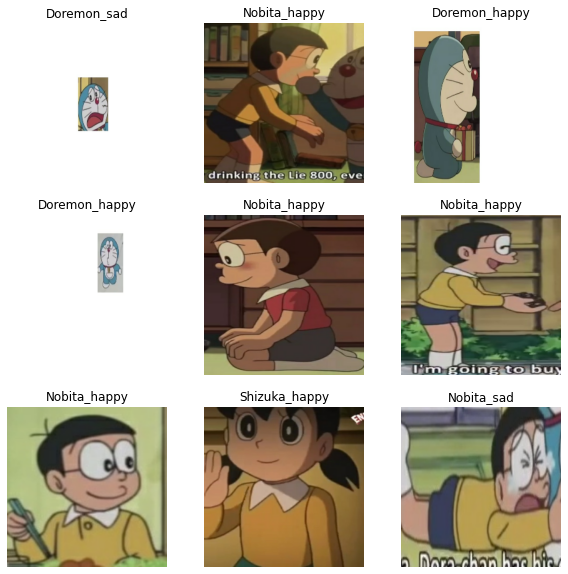

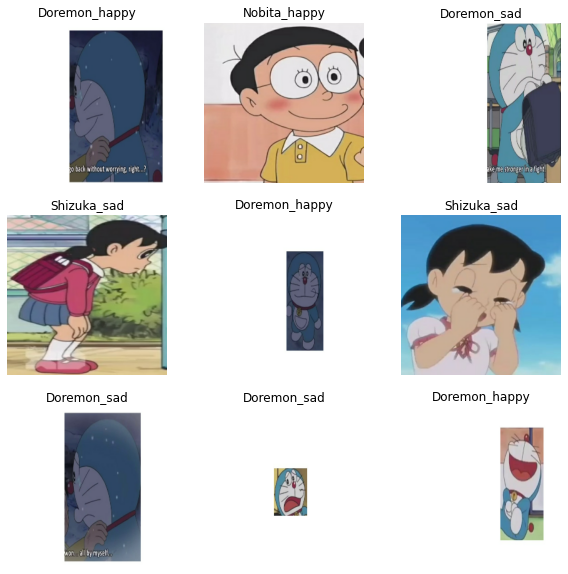

In [39]:
#required libraries
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#sequnetial models are more time consuming than parallel models, because they perform iteratively.

# path to dataset in santosh local machine.
#path = "/Users/santosh/Documents/CS584/dataset/train/"

#path to dataset in drive via colab.
path = "/content/drive/MyDrive/train"

#setting image dimensions
img_height = 256
img_width = 256


#Model data set with 6-emotions
# here we took 80-20 data split
#training ds
train_ds_6e = tf.keras.utils.image_dataset_from_directory(
    path,
    labels = 'inferred',
    validation_split = 0.2,
    subset = "training",
    seed = 108,
    batch_size = 32,
    image_size = (img_height, img_width)
)

#validation ds
val_ds_6e = tf.keras.utils.image_dataset_from_directory(
    path,
    labels = 'inferred',
    validation_split = 0.2,
    subset = "validation",
    seed = 108,
    batch_size = 32,
    image_size = (img_height, img_width)
)


#class names
class_names = train_ds_6e.class_names
print("class names: ")
print(class_names)

#visualising the data
plt.figure(figsize=(10, 10))
#training ds
for images, labels in train_ds_6e.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
#validation ds
plt.figure(figsize=(10, 10))
for images, labels in val_ds_6e.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [40]:
for image_batch, labels_batch in train_ds_6e:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 256, 256, 3)
(32,)


As we can see, our image batch consists of 32 image samples with each image being of size 256x256x3.

3 indicates RGB. 

image_batch is a tensor.


In [41]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds_6e = train_ds_6e.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds_6e = val_ds_6e.cache().prefetch(buffer_size=AUTOTUNE)

dataset.cache() keeps the images in memory after first epoch.

dataset.prefetch() overlaps data Processing and model execution while training.

Normalisation:

RGB consists of values from [0,255] which will be not good for creating a NN.
we will Rescale the values between [0,1] using layers from keras.

In [42]:
normalization_layer = layers.Rescaling(1./255)

In [43]:
#Normalising training data
normalized_ds_6e = train_ds_6e.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds_6e))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.055785358 0.44199252


CNN Model:

Create the model

The Keras Sequential model consists of three convolution blocks (tf.keras.layers.Conv2D) with a max pooling layer (tf.keras.layers.MaxPooling2D) in each of them. There's a fully-connected layer (tf.keras.layers.Dense) with 128 units on top of it that is activated by a ReLU activation function ('relu').

padding = one of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input. When padding="same" and strides=1, the output has the same size as the input.

Dense Layer is simple layer of neurons in which each neuron receives input from all the neurons of previous layer, thus called as dense. Dense Layer is used to classify image based on output from convolutional layers. Working of single neuron. A layer contains multiple number of such neurons.

Output of kernal filter cannot be directly sent to Dense layer, dense needs 1-D array input. so we use Flatten before Dense.
here our final dense layer contains 6 classes {subject ot change depending on model and number of classesf}

In [44]:
num_classes = len(class_names)
#Initial CNN model with 3 pairs of conv2D and MaxPooling layers. and 2 dense layers.
model_6e = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

Compile the model

For this project, choose the tf.keras.optimizers.Adam optimizer and tf.keras.losses.SparseCategoricalCrossentropy loss function. 

To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile.

Adam optimizer - https://www.geeksforgeeks.org/intuition-of-adam-optimizer/


In [45]:
#model compilation
model_6e.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
#model summary
model_6e.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)       

From above summary, we can see the layers used in our Initial CNN model.

Parameters (params) are the weights and biases that will be used for computation in all neurons of the CNN.

Model training

In [47]:
#model training.
epochs=10
history = model_6e.fit(
    train_ds_6e,
    validation_data=val_ds_6e,
    epochs=epochs
)

Epoch 1/10
42/42 [==============================] - 3s 69ms/step - loss: 1.3614 - accuracy: 0.4695 - val_loss: 0.7553 - val_accuracy: 0.6506
Epoch 2/10
42/42 [==============================] - 2s 46ms/step - loss: 0.5729 - accuracy: 0.7652 - val_loss: 0.4628 - val_accuracy: 0.8102
Epoch 3/10
42/42 [==============================] - 2s 45ms/step - loss: 0.3059 - accuracy: 0.8781 - val_loss: 0.4212 - val_accuracy: 0.8584
Epoch 4/10
42/42 [==============================] - 2s 45ms/step - loss: 0.1405 - accuracy: 0.9541 - val_loss: 0.5371 - val_accuracy: 0.8193
Epoch 5/10
42/42 [==============================] - 2s 45ms/step - loss: 0.1160 - accuracy: 0.9684 - val_loss: 0.4790 - val_accuracy: 0.8645
Epoch 6/10
42/42 [==============================] - 2s 45ms/step - loss: 0.0958 - accuracy: 0.9759 - val_loss: 0.5265 - val_accuracy: 0.8735
Epoch 7/10
42/42 [==============================] - 2s 45ms/step - loss: 0.0384 - accuracy: 0.9895 - val_loss: 0.9943 - val_accuracy: 0.7831
Epoch 8/10
42

Visualizing the results.

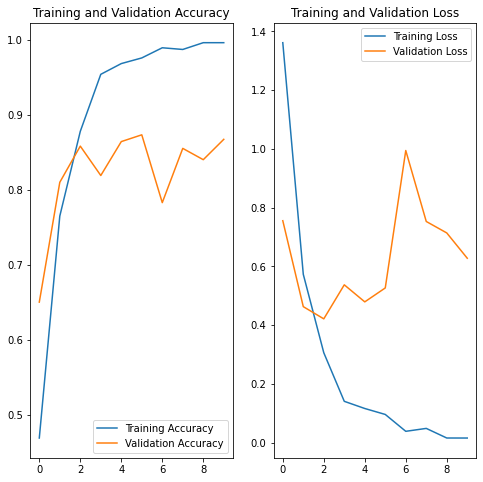

In [48]:
#visualisation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Initial conclusions:

The graph shows that model has achieved around 87% accuracy for validation data.

We can see that, the model has good training accuracy but less validation accuracy which is a symbol of Overfitting.

**Steps to reduce overfitting**:

Since we have very less data in certain emotions, our model learned a lot from noises and failed to recognise new data.

We will use data augmentation to generate additinal training samples.

Data Augmentation is a process where the new images are created by randomly filpping, rotating, zooming existing images. 



In [49]:
#augmentaion
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal",
                          input_shape=(img_height,
                                       img_width,
                                       3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

Visualising new augmented samples.

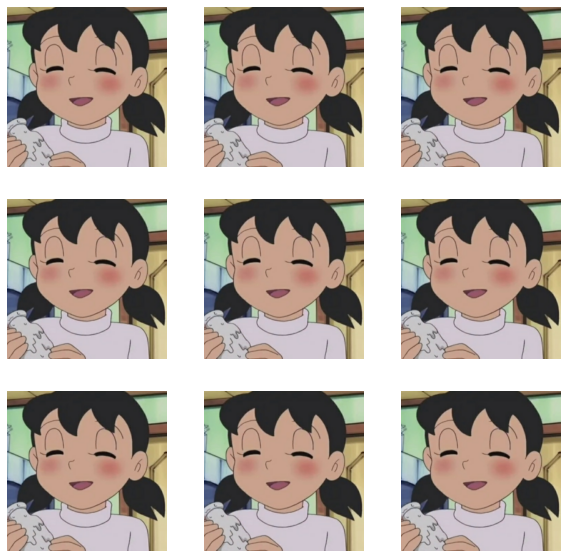

In [50]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds_6e.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Dropout
Another technique to reduce overfitting is to introduce dropout regularization to the network.

When you apply dropout to a layer, it randomly drops out (by setting the activation of a neuron to zero) a number of output units from the layer during the training process.
 
Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

Create a new neural network with tf.keras.layers.Dropout before training it using the augmented images:

In [51]:
num_classes = len(class_names)
#creating new model with the augmentated and dropout layers.
model_6eA = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, name="outputs")
])

Compile and train the model

In [52]:
model_6eA.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
model_6eA.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

As you can see from above summary our internal layers for new CNN model.

In [54]:
#Model training.
epochs = 10
history = model_6eA.fit(
    train_ds_6e,
    validation_data=val_ds_6e,
    epochs=epochs
)

Epoch 1/10
42/42 [==============================] - 4s 68ms/step - loss: 1.7666 - accuracy: 0.3469 - val_loss: 1.2748 - val_accuracy: 0.3343
Epoch 2/10
42/42 [==============================] - 3s 62ms/step - loss: 1.1627 - accuracy: 0.4379 - val_loss: 1.0216 - val_accuracy: 0.4729
Epoch 3/10
42/42 [==============================] - 3s 64ms/step - loss: 1.0279 - accuracy: 0.5440 - val_loss: 0.9131 - val_accuracy: 0.6235
Epoch 4/10
42/42 [==============================] - 3s 62ms/step - loss: 0.8277 - accuracy: 0.6268 - val_loss: 0.7883 - val_accuracy: 0.6476
Epoch 5/10
42/42 [==============================] - 3s 65ms/step - loss: 0.7210 - accuracy: 0.7013 - val_loss: 0.6522 - val_accuracy: 0.7259
Epoch 6/10
42/42 [==============================] - 3s 64ms/step - loss: 0.6566 - accuracy: 0.7208 - val_loss: 0.6326 - val_accuracy: 0.7289
Epoch 7/10
42/42 [==============================] - 3s 64ms/step - loss: 0.5988 - accuracy: 0.7381 - val_loss: 0.7484 - val_accuracy: 0.7048
Epoch 8/10
42

Visualising

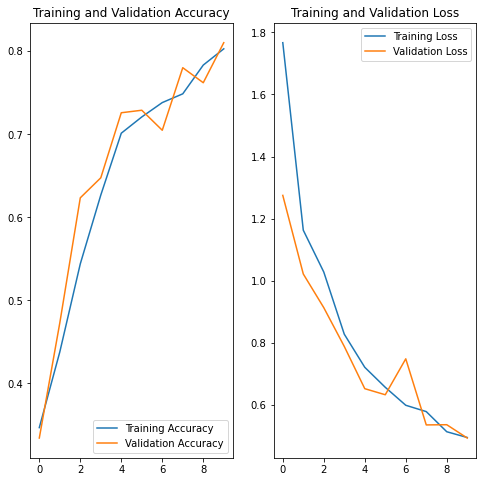

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Conclusion:**

As you can see from our graph, our validation accuracy stands around 80% but this time we have reduced Overfitting by huge amount.

Thus our steps to reduce over fitting worked well.


Predicting results

Now we will test our model on new unseen images.

1/1 [==============================] - 0s 69ms/step
augmented model result - This image most likely belongs to Nobita_happy with a 99.70 percent confidence.
normal model result - This image most likely belongs to Nobita_happy with a 99.65 percent confidence.


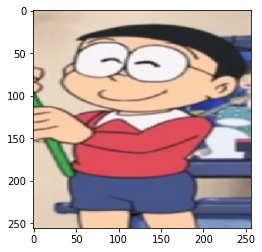

In [56]:
#image path in santosh local machine.
#test_path = "/Users/santosh/Documents/CS584/dataset/manual_test/frame3.jpg"

#image path in drive via colab
test_path = "/content/drive/MyDrive/manual_test/frame3.jpg"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model_6eA.predict(img_array)
score = tf.nn.softmax(predictions[0])
predictions1 = model_6e.predict(img_array)
score1 = tf.nn.softmax(predictions1[0])

plt.imshow(img)

print(
    "augmented model result - This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
print(
    "normal model result - This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score1))
)

**Hyper parameter tuning**

Below is an attempt to further increase the model accuracy by tuning its parameters.

We will use keras tuner to tune our model parameters / hyper paramerters

Reference- Official Tensor flow tutorial.

https://www.tensorflow.org/tutorials/keras/keras_tuner



In [57]:
##initilally, we tried to tune all the layers but, the Google Colab GPU did not support it. The GPU was fully consumed and code got stopped in the middle.
##so, we decided to move on to tuning only dropout and learning rate.

# import keras_tuner as kt


# def build_model(hp):
#     model = Sequential([
#         data_augmentation,
#         layers.Rescaling(1./255,input_shape = (img_height,img_width,3)),
#         layers.Conv2D(
#             filters = hp.Int('conv_1_filter',min_value=16,max_value=256,step=16),
#             kernel_size = hp.Choice('conv_1_filter',values=[3,5]),
#             activation = 'relu',
#             padding = 'same',
#             input_shape = (256,256,3)
#         ),
#         layers.MaxPooling2D(),
#         layers.Conv2D(
#             filters = hp.Int('conv_2_filter',min_value=16,max_value=256,step=16),
#             kernel_size = hp.Choice('conv_2_filter',values=[3,5]),
#             activation = 'relu',
#             padding = 'same'
#         ),
#         layers.MaxPooling2D(),
#         layers.Conv2D(
#             filters = hp.Int('conv_3_filter',min_value=16,max_value=256,step=16),
#             kernel_size = hp.Choice('conv_3_filter',values=[3,5]),
#             activation = 'relu',
#             padding = 'same'
#         ),
#         layers.MaxPooling2D(),
#         layers.Dropout(
#             rate = hp.Choice('Dropout_1_rate',values=[0.2,0.5])
#         ),
#         layers.Flatten(),
#         layers.Dense(
#             units = hp.Int('dense_1_unit',min_value=16, max_value=256,step=16),
#             activation = 'relu'
#         ),
#         layers.Dense(num_classes,name = "Dense_layer_2_outputs",activation = 'softmax')
#     ])
#     model.compile(
#         optimizer = keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])),
#         loss = tf.keras.losses.SparseCategoricalCrossentropy(), # removing (from_logits=True)
#         metrics = ['accuracy']
#     )
#     return model

In [58]:
#installing keras tuner

!pip install keras-tuner 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import keras_tuner as kt
#Initially, we will only try to play with drop out layer and learning rate.

def build_model(hp):
    model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    # we are choosing dropout layer in between 20% to 50%
        layers.Dropout(
            rate = hp.Choice('Dropout_1_rate',values=[0.2,0.5])
        ),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes,name = "Dense_layer_2_outputs",activation = 'softmax')
    ])
    model.compile(
        # we are also changing learning rate between 0.01 and 0.001
        optimizer = keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])),
        loss = tf.keras.losses.SparseCategoricalCrossentropy(), # removing (from_logits=True)
        metrics = ['accuracy']
    )
    return model

In [60]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [61]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Doremon1")

In [62]:
#this will search all the models and gives the best result.
#this also saves each model trail result in output folder.
tuner_search.search(image_batch,labels_batch,epochs=4,validation_split=0.2)

In [63]:
# here we will take the best model out of all the other models the keras has trained
best_model = tuner_search.get_best_models(num_models=1)[0]

In [64]:
#sumamry of best_model
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                    

In [65]:
best_model.fit(train_ds_6e,
    validation_data=val_ds_6e,
    epochs=10,initial_epoch = 4) # here we are continuing our model training from 5th epoch

Epoch 5/10
42/42 [==============================] - 5s 96ms/step - loss: 1.4150 - accuracy: 0.4342 - val_loss: 1.0805 - val_accuracy: 0.5602
Epoch 6/10
42/42 [==============================] - 4s 97ms/step - loss: 0.9324 - accuracy: 0.5884 - val_loss: 0.7874 - val_accuracy: 0.6506
Epoch 7/10
42/42 [==============================] - 4s 107ms/step - loss: 0.7872 - accuracy: 0.6644 - val_loss: 0.6887 - val_accuracy: 0.7169
Epoch 8/10
42/42 [==============================] - 5s 115ms/step - loss: 0.6960 - accuracy: 0.7035 - val_loss: 0.6944 - val_accuracy: 0.6988
Epoch 9/10
42/42 [==============================] - 5s 119ms/step - loss: 0.6523 - accuracy: 0.7178 - val_loss: 0.5878 - val_accuracy: 0.7470
Epoch 10/10
42/42 [==============================] - 4s 101ms/step - loss: 0.5671 - accuracy: 0.7675 - val_loss: 0.5285 - val_accuracy: 0.7952


**Conclusion:**

We tried changing hyper parameters ( dropout rate and learning rate) but we could not get desired results, we need to do more hyper parameter tuning to get our results more accurately than what we got with our augmented model ( model_6eA)

As of now we are leaving this hyper parameter tuning for future development.


Feature maps

In [66]:
layer_names = [layer.name for layer in model_6e.layers]
layer_names

['rescaling_2',
 'conv2d_3',
 'max_pooling2d_3',
 'conv2d_4',
 'max_pooling2d_4',
 'conv2d_5',
 'max_pooling2d_5',
 'flatten_1',
 'dense_1',
 'dense_2']

In [67]:
layer_names = [layer.name for layer in model_6eA.layers]
layer_names

['sequential_2',
 'rescaling_3',
 'conv2d_6',
 'max_pooling2d_6',
 'conv2d_7',
 'max_pooling2d_7',
 'conv2d_8',
 'max_pooling2d_8',
 'dropout_1',
 'flatten_2',
 'dense_3',
 'outputs']

(1, 256, 256, 3)


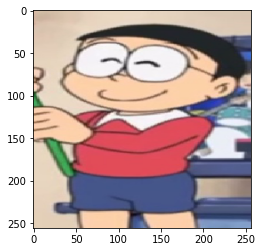

In [68]:
# image_path= r"path of the image from desktop or internet."
# img = load_img(image_path, target_size=(150, 150))
# input = img_to_array(img)
# input = x.reshape((1,) + x.shape)
# input /= 255.0

#image path in santosh local machine.
#test_path = "/Users/santosh/Documents/CS584/dataset/manual_test/frame3.jpg"

#image path in drive via colab
test_path = "/content/drive/MyDrive/manual_test/frame3.jpg"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
img_array = img_array / 255




# Print image tensor shape
print(img_array.shape)

# Print image
import matplotlib.pyplot as plt
plt.imshow(img_array[0])
plt.show()


**Keral Visualisation**

Here we will try to visulaise some of the kernals and hidden layer outputs of initial model ( model_6e)

1/1 [==============================] - 0s 73ms/step
(1, 256, 256, 3)
(1, 256, 256, 16)


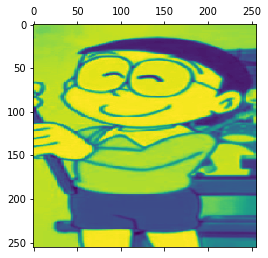

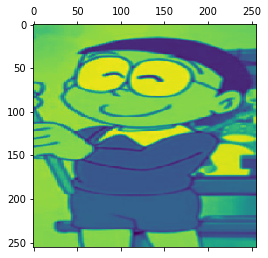

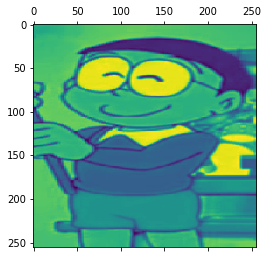

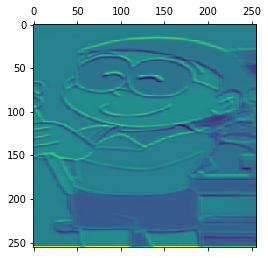

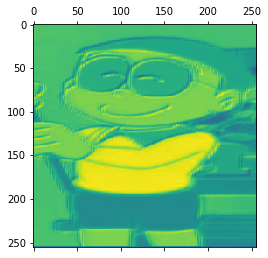

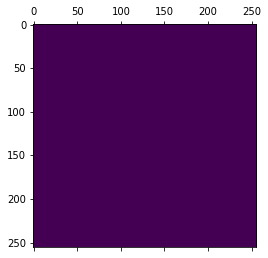

In [73]:
# Outputs of the 8 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model_6e.layers[:8]]
activation_model = tf.keras.models.Model(inputs = model_6e.input, outputs = layer_outputs)
activations = activation_model.predict(img_array)

# Getting Activations of first layer
first_layer_activation = activations[0]

# shape of first layer activation
print(first_layer_activation.shape)

# 6th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 0], cmap ='viridis')

# 15th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 1], cmap ='viridis')

plt.matshow(first_layer_activation[0, :, :, 2], cmap ='viridis')

# Getting Activations of first layer
second_layer_activation = activations[1]

# shape of second layer activation
print(second_layer_activation.shape)

# 6th channel of the image after second layer of convolution is applied
plt.matshow(second_layer_activation[0, :, :, 0], cmap ='viridis')

# 15th channel of the image after second layer of convolution is applied
plt.matshow(second_layer_activation[0, :, :, 1], cmap ='viridis')

plt.matshow(second_layer_activation[0, :, :, 2], cmap ='viridis')


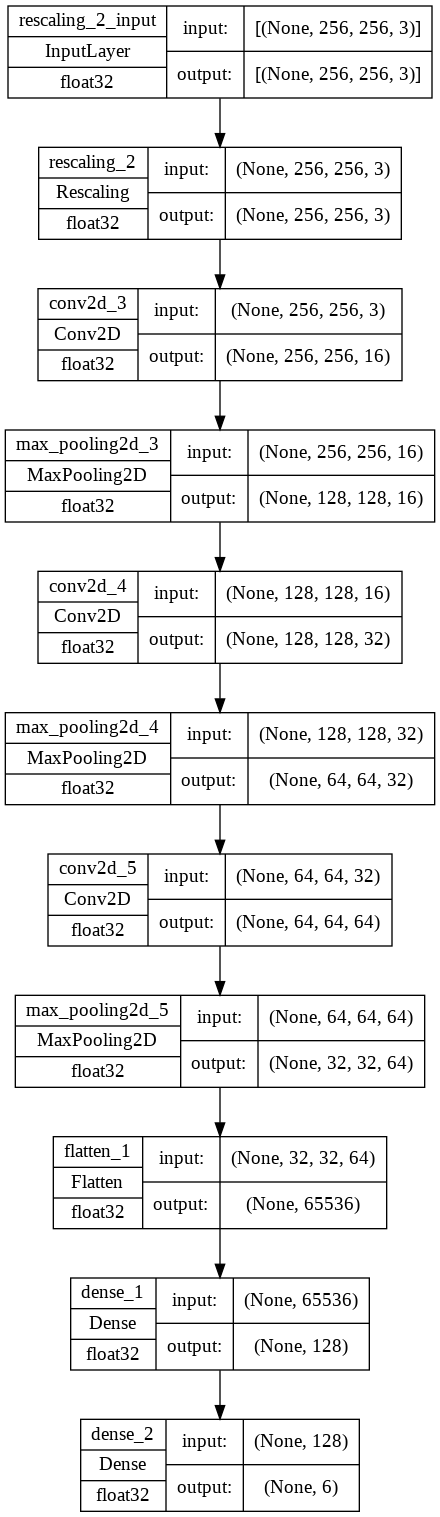

In [75]:
tf.keras.utils.plot_model(model_6e, show_shapes=True, show_dtype=True)

In [76]:
feature_maps = activation_model.predict(img_array)

1/1 [==============================] - 0s 19ms/step


In [77]:
for layer_name, feature_map in zip(layer_names, feature_maps):
    print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")

The shape of the sequential_2 is =======>> (1, 256, 256, 3)
The shape of the rescaling_3 is =======>> (1, 256, 256, 16)
The shape of the conv2d_6 is =======>> (1, 128, 128, 16)
The shape of the max_pooling2d_6 is =======>> (1, 128, 128, 32)
The shape of the conv2d_7 is =======>> (1, 64, 64, 32)
The shape of the max_pooling2d_7 is =======>> (1, 64, 64, 64)
The shape of the conv2d_8 is =======>> (1, 32, 32, 64)
The shape of the max_pooling2d_8 is =======>> (1, 65536)


In [78]:
# retrieve weights from the second hidden layer
filters, biases = model_6e.layers[1].get_weights()

In [79]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

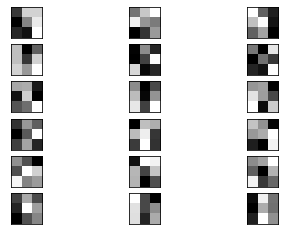

In [80]:

# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
plt.show()

In [81]:
layer_outputs = [layer.output for layer in model_6e.layers]
feature_map_model = tf.keras.models.Model(model_6e.input, layer_outputs)
feature_maps = feature_map_model.predict(img_array)
type(feature_maps)

1/1 [==============================] - 0s 85ms/step


list

In [82]:
#feature_maps

[array([[[[0.00316801, 0.00262976, 0.00232218],
          [0.00335256, 0.00286044, 0.00253749],
          [0.00335256, 0.00286044, 0.00253749],
          ...,
          [0.0033218 , 0.00304498, 0.00273741],
          [0.0033218 , 0.00304498, 0.00273741],
          [0.0033218 , 0.00304498, 0.00273741]],
 
         [[0.00318339, 0.00264514, 0.00233756],
          [0.00333718, 0.00284506, 0.00252211],
          [0.00333718, 0.00284506, 0.00252211],
          ...,
          [0.0033218 , 0.00304498, 0.00273741],
          [0.0033218 , 0.00304498, 0.00273741],
          [0.0033218 , 0.00304498, 0.00273741]],
 
         [[0.00313726, 0.00264514, 0.00232218],
          [0.0033218 , 0.00282968, 0.00250673],
          [0.0033218 , 0.00282968, 0.00250673],
          ...,
          [0.0033218 , 0.00304498, 0.00273741],
          [0.0033218 , 0.00304498, 0.00273741],
          [0.0033218 , 0.00304498, 0.00273741]],
 
         ...,
 
         [[0.00349097, 0.00318339, 0.0028143 ],
          [0.00349

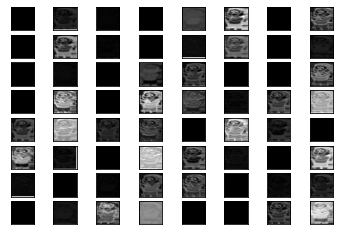

In [89]:

# plot all 64 maps in an 8x8 squares


square = 8
ix = 1
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        try:
            # plot filter channel in grayscale
            plt.imshow(feature_maps[6][0, :, :, ix-1], cmap='gray') # change the number in the array to get different layer images.
        finally:
          pass
        ix += 1
plt.show()

